Quantify the growth of neuronal traces between DIV4 and DIV6.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from scipy import stats

In [2]:
plt.rcParams.update({'font.size':15,
                     'axes.spines.right':False,
                     'axes.spines.top':False,
                     'axes.grid':False
                    })

# Color code used for plots
clclst = {'div4':'#0072B2', 'div6':'#CC79A7'}

In [3]:
# %matplotlib ipympl

# Import table

In [4]:
df = pd.read_csv("output/df.csv")
df

,Unnamed: 0,Follium,Filaments,Xint,Yint,Zint,Xtheta,Ytheta,Ztheta,F1theta,F2theta,Length,Tortuosity,Localscale
0,0,DIV4,0,430.465240,447.586555,0.500003,31.040309,114.443341,87.108132,41.791491,128.390579,128.107421,1.052240,15.250000
1,1,DIV4,1,430.465240,447.586555,0.500003,39.845782,129.101915,88.089947,27.222149,114.405734,122.082256,1.012144,12.257576
2,2,DIV4,2,430.465240,447.586555,0.500003,29.932799,117.635692,84.645488,38.842236,125.528968,103.733186,1.019686,20.448276
3,3,DIV4,3,390.250767,404.129224,37.068116,33.358235,112.873870,70.107776,45.949461,125.176204,38.672471,1.028899,27.869565
4,4,DIV4,4,350.664544,340.995682,55.500011,105.798168,151.422255,98.552430,43.689734,48.991032,101.059163,1.123971,26.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
469,469,DIV6,275,607.941699,471.087529,58.725787,141.113943,60.004518,97.988245,59.862011,143.042285,47.149356,1.125543,17.110119
470,470,DIV6,276,586.930520,460.068610,60.212986,144.779096,55.029250,91.334438,60.257428,150.311441,30.068123,1.017477,29.000000
471,471,DIV6,277,494.108010,428.370497,60.500065,155.674909,67.911424,95.021695,48.325115,137.009621,147.520755,1.035432,17.761905
472,472,DIV6,278,585.177654,436.174565,62.864164,141.432191,54.866972,89.325745,61.974598,149.033739,227.495926,1.054482,33.780702


# Number of branching points

In [5]:
nbdiv4 = len(df[df["Follium"]=="DIV4"])
nbdiv6 = len(df[df["Follium"]=="DIV6"])

print("nb of branchings in DIV4:",nbdiv4)
print("nb of branchings in DIV6:",nbdiv6)

nb of branchings in DIV4: 194
nb of branchings in DIV6: 280


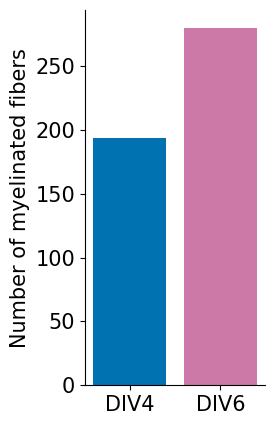

In [6]:
fig = plt.figure(figsize=(3,4.5))
ax = fig.add_subplot(111)
ax.bar(['DIV4','DIV6'],[nbdiv4,nbdiv6],color=[clclst['div4'],clclst['div6']])
ax.set_ylabel('Number of myelinated fibers')
plt.tight_layout();
fig.savefig("output/number.png",dpi=400)

# Lengths

/tmp/ipykernel_2625763/2289778332.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y="Length",x="Follium",data=df,palette=[clclst['div4'],clclst['div6']],showfliers=False);


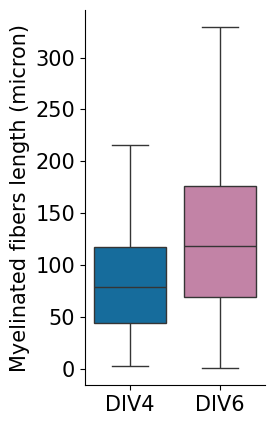

In [7]:
fig = plt.figure(figsize=(3,4.5))
ax = fig.add_subplot(111)
sns.boxplot(y="Length",x="Follium",data=df,palette=[clclst['div4'],clclst['div6']],showfliers=False);
ax.set_ylabel('Myelinated fibers length (micron)')
ax.set_xlabel('');
plt.tight_layout();
fig.savefig("output/length.png",dpi=400)

In [8]:
stats.ttest_ind(df[df["Follium"]=="DIV4"]["Length"].values,df[df["Follium"]=="DIV6"]["Length"].values)

TtestResult(statistic=-6.817526440174121, pvalue=2.8408277131384485e-11, df=472.0)

# Tortuosities (or Wiggliness)

/tmp/ipykernel_2625763/662432381.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y="Tortuosity",x="Follium",data=df,palette=[clclst['div4'],clclst['div6']],showfliers=False);


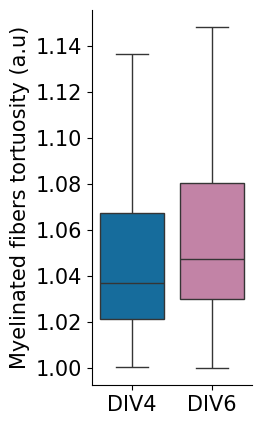

In [9]:
fig = plt.figure(figsize=(3,4.5))
ax = fig.add_subplot(111)
sns.boxplot(y="Tortuosity",x="Follium",data=df,palette=[clclst['div4'],clclst['div6']],showfliers=False);
ax.set_ylabel('Myelinated fibers tortuosity (a.u)')
ax.set_xlabel('');
plt.tight_layout();
fig.savefig("output/tortuosity.png",dpi=400)

In [10]:
stats.ttest_ind(df[df["Follium"]=="DIV4"]["Tortuosity"].values,df[df["Follium"]=="DIV6"]["Tortuosity"].values)

TtestResult(statistic=-2.1550198200309976, pvalue=0.03166536371823254, df=472.0)

# Angles

In [11]:
def rose_plot(ax, angles, bins=16, density=None, offset=0, lab_unit="degrees",
              start_zero=False, ymin=None, ymax=None, color='k', linewidth=1.5, **param_dict):
    """
    Plot polar histogram of angles on ax. ax must have been created using
    subplot_kw=dict(projection='polar'). Angles are expected in radians.
    Source: https://jwalton.info/Matplotlib-rose-plots/ 
    """
    # Wrap angles to [-pi, pi)
    angles = (angles + np.pi) % (2*np.pi) - np.pi

    # Set bins symetrically around zero
    if start_zero:
        # To have a bin edge at zero use an even number of bins
        if bins % 2:
            bins += 1
        bins = np.linspace(-np.pi, np.pi, num=bins+1)

    # Bin data and record counts
    count, bin = np.histogram(angles, bins=bins)

    # Compute width of each bin
    widths = np.diff(bin)

    # By default plot density (frequency potentially misleading)
    if density is None or density is True:
        # Area to assign each bin
        area = count / angles.size
        # Calculate corresponding bin radius
        radius = (area / np.pi)**.5
    else:
        radius = count

    # Plot data on ax
    ax.bar(bin[:-1], radius, zorder=1, align='edge', width=widths,
           edgecolor=color, fill=False, linewidth=linewidth)

    # Set the direction of the zero angle
    ax.set_theta_offset(offset)

    # Remove ylabels, they are mostly obstructive and not informative
    # ax.set_yticks([])
    if (ymin is not None) & (ymax is not None):
        ax.set_ylim(ymin,ymax)

    if lab_unit == "radians":
        label = ['$0$', r'$\pi/4$', r'$\pi/2$', r'$3\pi/4$',
                  r'$\pi$', r'$5\pi/4$', r'$3\pi/2$', r'$7\pi/4$']
        ax.set_xticklabels(label)


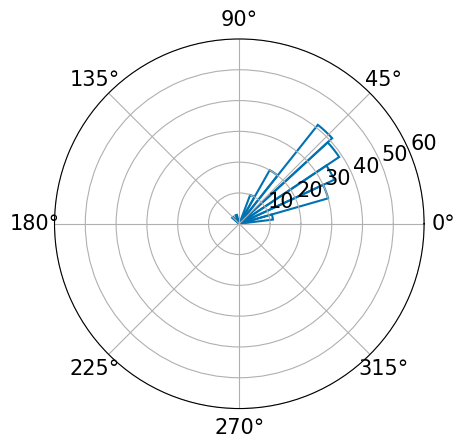

In [12]:
fig, ax = plt.subplots(1, 1, subplot_kw=dict(projection='polar'))
theta = df[df["Follium"]=="DIV4"]["F1theta"].values*np.pi/180
rose_plot(ax, theta, density=False, bins=15, ymin=0, ymax=60, color=clclst['div4'])
fig.savefig("output/polar_div4.png",dpi=400)

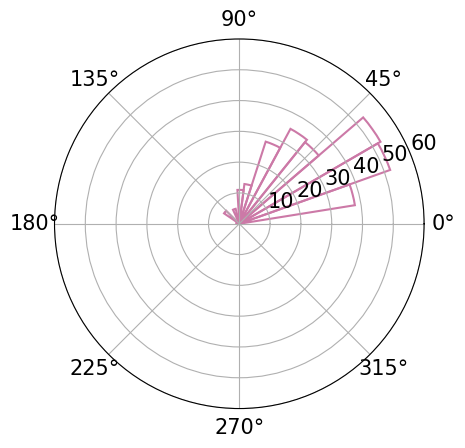

In [13]:
fig, ax = plt.subplots(1, 1, subplot_kw=dict(projection='polar'))
theta = df[df["Follium"]=="DIV6"]["F1theta"].values*np.pi/180
rose_plot(ax, theta, density=False, bins=15,ymin=0,ymax=60, color=clclst['div6'])
fig.savefig("output/polar_div6.png",dpi=400)